In [3]:
import numpy as np
import pandas as pd

data_excel = pd.read_excel('./Data Kunjungan Mahasiswa ke Perpustakaan Undiksha.xlsx'
                           ,sheet_name='Dasbor')
data_excel.fillna(0,inplace=True)
data_excel["Jumlah Pengunjung"].describe()

count    120.000000
mean       0.558333
std        0.941979
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: Jumlah Pengunjung, dtype: float64

Histogram persebaran jumlah pengunjung per menit


<Axes: >

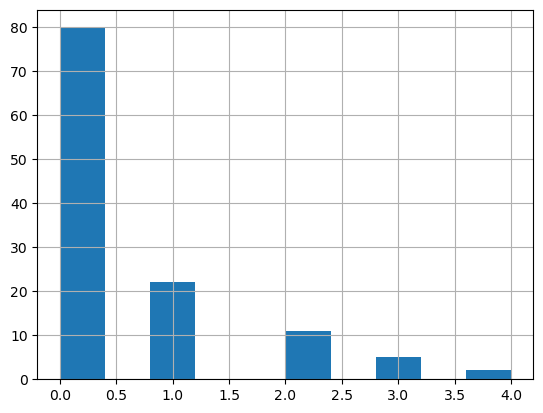

In [4]:
print("Histogram persebaran jumlah pengunjung per menit")
data_excel["Jumlah Pengunjung"].hist()

In [10]:
val_counts = pd.DataFrame(data_excel["Jumlah Pengunjung"].value_counts())
val_counts['probability'] = [c/val_counts["Jumlah Pengunjung"].sum()
                             for c in val_counts["Jumlah Pengunjung"]]
val_counts

,Jumlah Pengunjung,probability
0.0,80,0.666667
1.0,22,0.183333
2.0,11,0.091667
3.0,5,0.041667
4.0,2,0.016667


# Simulasi lempar dadu

In [121]:
import random

N_lempar = 100
N_dadu = 3
df = []
for i in range(N_lempar):
    row = {}
    for j in range(N_dadu):
        row[f'random_{j+1}'] = rand = random.random()
        row[f'dadu_{j+1}'] = dadu = rand*6 //1 + 1
    df.append(row)

lemparan_dadu = pd.DataFrame(df)
lemparan_dadu.describe()

,random_1,dadu_1,random_2,dadu_2,random_3,dadu_3
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.426724,3.060000,0.500709,3.480000,0.488941,3.430000
std,0.289871,1.739732,0.312584,1.855813,0.302727,1.736448
min,0.005805,1.000000,0.005390,1.000000,0.003177,1.000000
25%,0.168357,1.750000,0.206928,2.000000,0.214388,2.000000
50%,0.387586,3.000000,0.476782,3.000000,0.503315,4.000000
75%,0.669070,5.000000,0.772383,5.000000,0.710189,5.000000
max,0.994686,6.000000,0.995829,6.000000,0.993816,6.000000


In [122]:
df = []
for i in range(N_lempar):
    row = {}
    for j in range(1,7):
        rand = random.random()
        row[f'pasang_dadu_{j}'] = rand*20 //j + 1
    df.append(row)

pasang_dadu = pd.DataFrame(df)
pasang_dadu.describe()

,pasang_dadu_1,pasang_dadu_2,pasang_dadu_3,pasang_dadu_4,pasang_dadu_5,pasang_dadu_6
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,11.010000,5.910000,3.620000,3.160000,2.550000,2.190000
std,5.774369,2.916671,1.905759,1.502321,1.183856,1.011999
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,3.000000,2.000000,2.000000,1.000000,1.000000
50%,11.000000,6.000000,4.000000,3.000000,3.000000,2.000000
75%,16.000000,8.000000,5.000000,5.000000,4.000000,3.000000
max,20.000000,10.000000,7.000000,5.000000,4.000000,4.000000


# Simulasi Antrean Single Server

In [1]:
from simulasi_antrean import SimulationModel, Server

distribution1 = {1: 0.1, 2: 0.2, 3: 0.3, 4: 0.25, 5: 0.1, 6: 0.05}
# distribution2 = {7: 0.1, 3: 0.2, 9: 0.3, 8: 0.25, 6: 0.1, 2: 0.05}
distribution3 = {3: 0.2, 2: 0.2, 1: 0.05, 0: 0.55}

simulator = SimulationModel([
    Server(distribution1, name="Server1"),
    Server(distribution1, name="Server2"),
    Server(distribution1, name="Server3"),
    Server(distribution1, name="Server4"),
],
    intrArrivalDist=distribution3,
    delay=0
            )
simulator.resetSimulation(newMaxMin=100)
simulator.run(verbose=False)
# simulator.continueRun(add_minute=5, verbose=True)

for server in simulator.servers:
    print(server.info)


        server name    : Server1
        current status : 1 (busy)
        utilization    : 88.0% 
                         (idle time = 12, busy time = 88)
        current customer: Customer 84 
        current queue   : []
        customer served : [Customer 1, Customer 4, Customer 5, Customer 6, Customer 10, Customer 15, Customer 21, Customer 24, Customer 25, Customer 26, Customer 30, Customer 31, Customer 34, Customer 37, Customer 40, Customer 42, Customer 45, Customer 48, Customer 52, Customer 53, Customer 58, Customer 63, Customer 68, Customer 72, Customer 74, Customer 77, Customer 82]
        

        server name    : Server2
        current status : 0 (idle)
        utilization    : 80.0% 
                         (idle time = 20, busy time = 80)
        current customer: null 
        current queue   : []
        customer served : [Customer 2, Customer 7, Customer 11, Customer 13, Customer 16, Customer 19, Customer 22, Customer 27, Customer 32, Customer 38, Customer 41, Cust

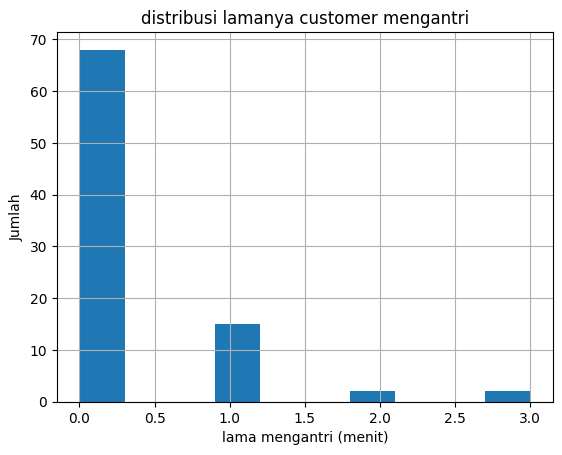

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

servered_customers = []
for server in simulator.servers:
    servered_customers.extend(server.serveredCustomer)

customers_data = {"name":[],
                  "arrival_time":[],
                  "server":[],
                  "queue_time":[],
                  "service_time":[],
                  "service_begin":[],
                  }
for customer in servered_customers:
    customers_data["name"].append(customer.name)
    customers_data["server"].append(customer.server.name)
    customers_data["arrival_time"].append(customer.arrivalTime)
    customers_data["queue_time"].append(customer.queueTime)
    customers_data["service_time"].append(customer.serviceTime)
    customers_data["service_begin"].append(customer.serviceBegin)

customers_df = pd.DataFrame(customers_data)
customers_df["total_time_spend"] = customers_df.service_time + customers_df.queue_time

# menampilkan histogram
customers_df.queue_time.hist()
plt.title("distribusi lamanya customer mengantri")
plt.xlabel("lama mengantri (menit)")
plt.ylabel("Jumlah")
plt.show()

In [3]:
from simulasi_antrean import  avg_distribution

print(
    "\npersentase customer ngantri :", sum(customers_df.queue_time > 0) / len(customers_df) * 100,"%",
    "\nrata rata service time pada simulasi :",customers_df.service_time.mean(),
    "\nrata rata service time sesuai distribusi :",avg_distribution(distribution1),
    "\nrata rata total waktu customer di sistem :",customers_df['total_time_spend'].mean(),
    "\nrata rata waktu ngantri :",customers_df.queue_time.mean(),
    "\nrata rata waktu ngantri (bagi yg ngantri) :", customers_df.loc[customers_df.queue_time > 0, "queue_time"].mean(),
)


persentase customer ngantri : 21.839080459770116 % 
rata rata service time pada simulasi : 3.2298850574712645 
rata rata service time sesuai distribusi : 3.2 
rata rata total waktu customer di sistem : 3.5172413793103448 
rata rata waktu ngantri : 0.28735632183908044 
rata rata waktu ngantri (bagi yg ngantri) : 1.3157894736842106


In [4]:
np.mean(simulator.interarivals), avg_distribution(distribution3)

(1.1235955056179776, 1.05)

In [16]:
tabel = customers_df.sort_values(by=['arrival_time', 'name']).reset_index(drop=True)
tabel.head(15)

,name,arrival_time,server,queue_time,service_time,service_begin,total_time_spend
0,Customer 1,1,Server1,0,3,1,3
1,Customer 2,3,Server2,0,2,3,2
2,Customer 3,3,Server3,0,3,3,3
3,Customer 4,5,Server1,0,1,5,1
4,Customer 5,6,Server1,0,2,6,2
5,Customer 6,9,Server1,0,3,9,3
6,Customer 10,11,Server1,0,5,12,5
7,Customer 11,11,Server2,1,2,13,3
8,Customer 7,11,Server2,0,2,11,2
9,Customer 8,11,Server3,0,3,11,3
